<a href="https://colab.research.google.com/github/Savvy-Slowley/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
filename = '/content/sales_predictions.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Rows,Columns
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Checking for duplicates
df.duplicated().any()

False

In [8]:
#Seeing which columns have NaN values and the quantity
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python
#This is a block of code that makes you see which rows have NAN values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [10]:
#Running a value count for Outlet Size because it has missing values that needs to be imputed
# I want to rename the data from high to large
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
#There is a trend between Outlet Size and Outlet Location Type where 'Tier 3'== 'Medium', 'Tier 1' == 'Small' & 'Tier 2' == 'High'
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 3')), 'Medium', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 1')), 'Small', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 2')), 'Large', df['Outlet_Size'])  
#Identifies the case to apply to
#This is the value that is inserted
#This is the column that is affected

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [13]:
# See if those NaN values changed
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [14]:
#Now an analysis has to be conducted to understand how to impute data 

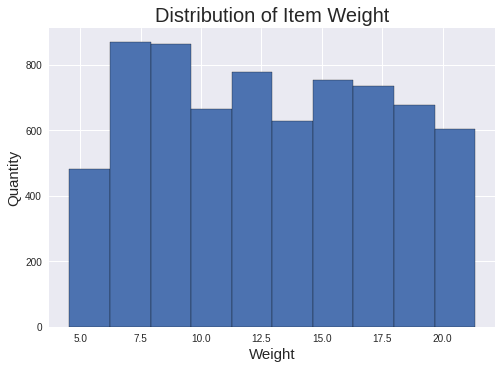

In [15]:
plt.style.use('seaborn')
df['Item_Weight'].hist(edgecolor='k');
plt.xlabel('Weight', fontsize = 15);
plt.ylabel('Quantity', fontsize = 15);
plt.title('Distribution of Item Weight', fontsize = 20);

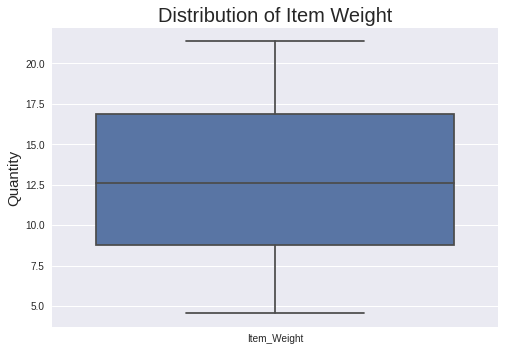

In [16]:
plt.style.use('seaborn')
sns.boxplot(data=df[['Item_Weight']]);
plt.ylabel('Quantity', fontsize = 15);
plt.title('Distribution of Item Weight', fontsize = 20);

In [17]:
#Because the distribution in this graph is even I will use the mean fill to put all the NaN values 

In [18]:
df['Item_Weight'].fillna(int(df['Item_Weight'].mean()), inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#Quickly checked all the value counts for each column to see if there is any data imputed incorrectly

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
#LF is suppose to be Low Fat and reg is suppose to be Regular

In [23]:
df = df.replace(['LF'], 'Low Fat')

In [24]:
df = df.replace(['reg'], 'Regular')

In [25]:
df = df.replace(['low fat'], 'Low Fat')

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

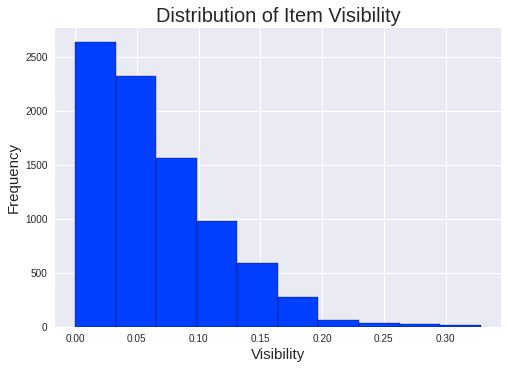

In [27]:
plt.style.use('seaborn-bright');
df['Item_Visibility'].hist(edgecolor='k');
plt.title('Distribution of Item Visibility', fontsize = 20);
plt.xlabel('Visibility', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

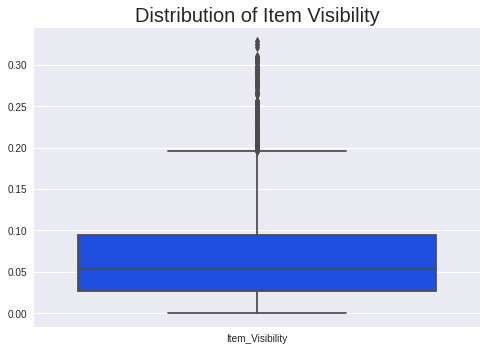

In [28]:
plt.style.use('seaborn-bright');
sns.boxplot(data=df[['Item_Visibility']]);
plt.title('Distribution of Item Visibility', fontsize = 20);

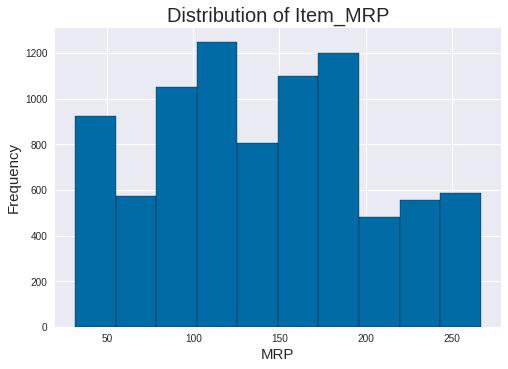

In [29]:
plt.style.use('tableau-colorblind10');
df['Item_MRP'].hist(edgecolor='k');
plt.title('Distribution of Item_MRP', fontsize = 20);
plt.xlabel('MRP', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

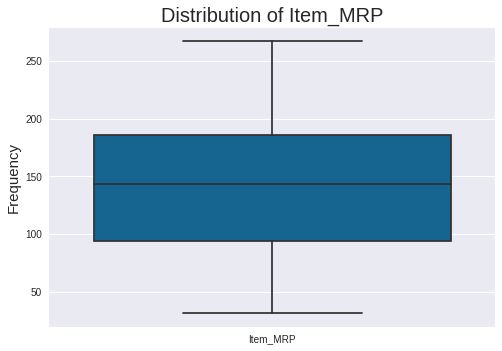

In [30]:
plt.style.use('tableau-colorblind10');
sns.boxplot(data=df[['Item_MRP']]);
plt.title('Distribution of Item_MRP', fontsize = 20);
plt.ylabel('Frequency', fontsize = 15);

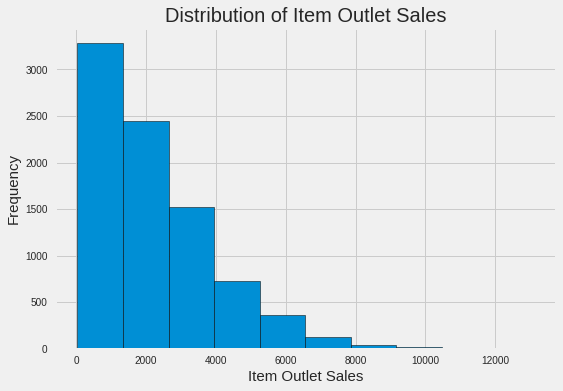

In [31]:
plt.style.use('fivethirtyeight');
df['Item_Outlet_Sales'].hist(edgecolor='k');
plt.title('Distribution of Item Outlet Sales', fontsize = 20);
plt.xlabel('Item Outlet Sales', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

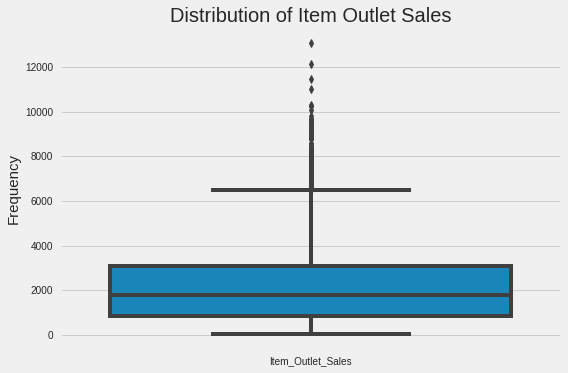

In [32]:
plt.style.use('fivethirtyeight');
sns.boxplot(data=df[['Item_Outlet_Sales']]);
plt.title('Distribution of Item Outlet Sales', fontsize = 20);
plt.ylabel('Frequency', fontsize = 15);

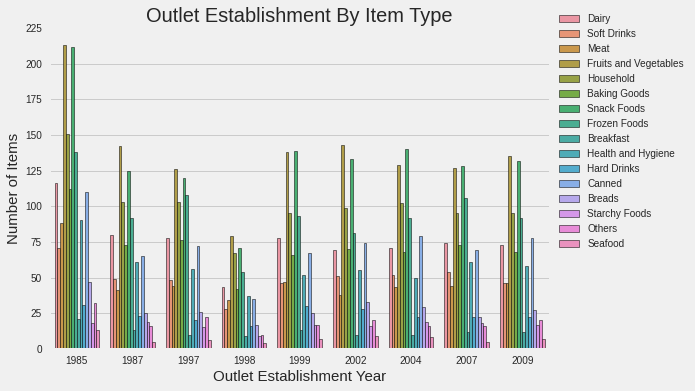

In [33]:
sns.countplot(x='Outlet_Establishment_Year',hue='Item_Type', edgecolor='k' ,data=df);
plt.legend(loc= (1.01, .3))
plt.title('Outlet Establishment By Item Type', fontsize = 20);
plt.xlabel('Outlet Establishment Year', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=225);  

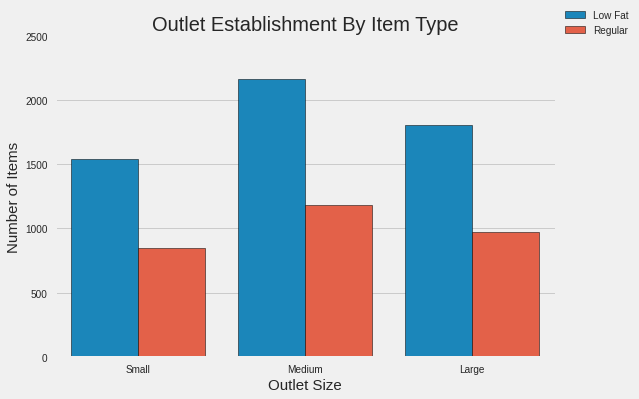

In [34]:
plt.style.use('fivethirtyeight');
sns.countplot(x='Outlet_Size',hue='Item_Fat_Content',edgecolor='k' ,data=df);
plt.legend(loc= (1.01, .99))
plt.title('Outlet Establishment By Item Type', fontsize = 20);
plt.xlabel('Outlet Size', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=2500);  

In [35]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.019059,0.025351,0.044968,0.005361
Item_Visibility,-0.019059,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025351,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.044968,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.005361,-0.128625,0.567574,-0.049135,1.000000


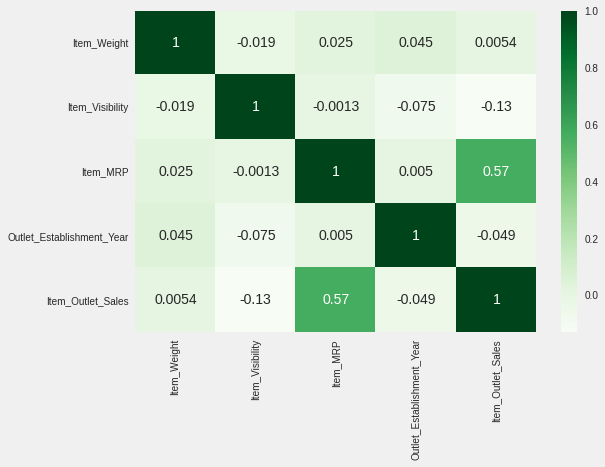

In [36]:
sns.heatmap(corr, cmap='Greens', annot=True);